In [1]:
#@title Librerias

import numpy as np # Númerica
import matplotlib.pyplot as plt # Gráficas
from scipy.integrate import quad, trapezoid, simpson, tplquad, fixed_quad # Integracón
from scipy.interpolate import CubicSpline, interp1d, lagrange # Interpolación
from scipy.optimize import fsolve, root_scalar, newton # Raíces
from scipy.stats import linregress # Regresión
import sympy as sp # Simbólica

# Parcial I - Métodos Computacionales
**2024-2**

---

*Nombre:*

*Identificación:*

---
* Sea honest@
* El uso de herramientas de IA no está permitido
* Puede consultar la documentación de las librerias.
* Sea ordendado dando la solución a cada punto.
* *Asegurese que el notebook corra completamente*
* Suba su notebook al GitHub del curso y recuerde hacer pull-request

# 1

**(40 puntos)** La velocidad del agua $v$ [m/s] en la descarga de un tanque cilindrico a través de un tubo largo (como se muestra en la figura) se puede calcular como:

$$
v = \sqrt{2gH}\tanh{\left(\frac{\sqrt{2gH}}{2L}t\right)}
$$



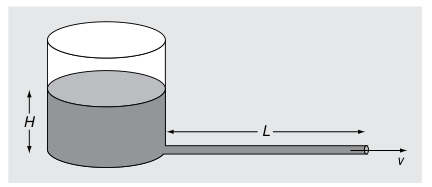

<function <lambda> at 0x7c532d654e00>


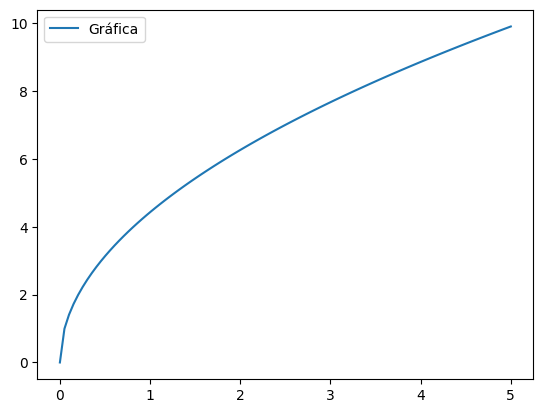

In [39]:
# Punto 1
L = 4
t = 2.5
H_axis = np.linspace (0,5,100)
grav = 9.8
f = lambda h: np.sqrt(2*grav*h)
g = lambda h: f(h)*np.tanh(f(h)*t/2*L) #a, b
print(g)
plt.plot(H_axis, g(H_axis), label = 'Gráfica')
plt.legend()
plt.show()

1.2755103707313538
1.2755102040816324


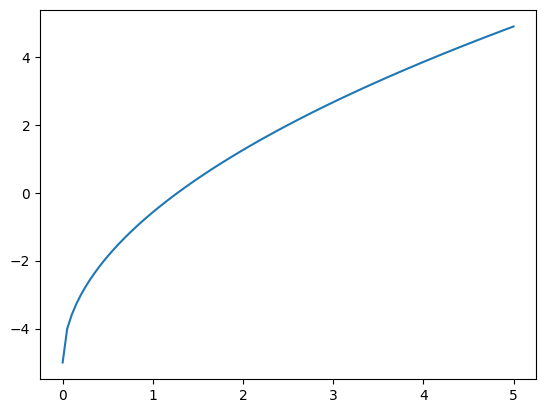

In [44]:
L = 4
t = 2.5
H_axis = np.linspace (0,5,100)
grav = 9.8
f = lambda h: np.sqrt(2*grav*h)
g = lambda h: f(h)*(np.tanh(f(h)*t/2*L)) - 5 #a, b
plt.plot(H_axis, g(H_axis))
g_solve = newton(g, 0)
g_solve2 = metodo_bisección(g, 0, 3)
print(g_solve2) #Probando que D funciona
print(g_solve) #c


In [37]:
def metodo_bisección(f, a, b, tol = 1e-7):
  while ((b-a)/2) > tol:
    c = (a+b)/2
    if f(c) == 0:
      return 0
    if f(a)*f(c) < 0:
      b = c
    else:
      a = c
  return c


donde $g$ = 9.81 m/s$^2$, H es la carga hidrostática inicial (m), L la longitud del tubo (m) y $t$ el tiempo transcurrido (s).

*a)* Escriba una función explicita para encontrar la velocidad de descarga en función de las variables asociadas.

*b)* Realice un gráfico de $v(H)$ para $0\leq H\leq 5$, con $L = 4$ m y para $t = 2.5$ s

*c)* Suponga que quiere conocer la carga hidrostática necesaria para tener una velocidad de 5 m/s transcurridos 2.5 s. Identifique gráficamente este valor.

*d)* Realice una función que encuentre la raiz usando el método de bisección con una tolerancia de 1e-7, para esto puede modificar el siguiente pseudo-código:


```python
MÉTODO BISECCIÓN(f, a, b, tol)
    MIENTRAS (b - a)/2 > tol HACER
        c = (a + b)/2
        
        SI f(c) = 0 ENTONCES
            RETORNAR c
        
        SI f(a)*f(c) < 0 ENTONCES
            b = c
        SINO
            a = c
        FIN SI
    FIN MIENTRAS
    
    RETORNAR (a + b)/2
FIN MÉTODO
```

*e)* Usando el método de `scipy.newton` encuentre el valor de la raiz

```python
# Método de Newton
root = newton(f, x0, fprime)  # fprime es la derivada
```

Compare sus respuestas con el numeral anterior y obtenga el error relativo.


In [87]:
h = sp.symbols('h')
from sympy import tanh
g = ((2*grav*h)**1/2)*(tanh(((2*grav*h)**(1/2))*t/2*L)) - 5
g_prime = sp.diff(g, h)
g = sp.lambdify(h, g, 'numpy')
g_prime = sp.lambdify(h, g_prime, 'numpy')
root1 = newton(g, 5, g_prime)
root2 = metodo_bisección(g, 0, 3)
print(root1, root2)

0.510204081632672 0.5102042555809021


In [74]:
# Aqui va su código

# 2

**(30 puntos)** Usualmente algunas reacciones quimicas siguen el siguiente modelo:

$$
\frac{dc}{dt} = -kc^n
$$

donde $c$ es la concentración, $t$ el tiempo, $k$ la tasa de la reacción y $n$ su orden. Usando los siguientes datos:



```python
# Datos dados
t = np.array([10, 20, 30, 40, 50, 60])
c = np.array([3.52, 2.48, 1.75, 1.23, 0.87, 0.61])
```


*a)* Conociendo que el método de diferencias finitas se puede escribir como:

###  Diferencias finitas hacia adelante:
Aproximación de primer orden:
$$
f'(x_i) \approx \frac{f(x_{i+1}) - f(x_i)}{h}
$$

### Diferencias finitas hacia atrás:
Aproximación de primer orden:
$$
f'(x_i) \approx \frac{f(x_i) - f(x_{i-1})}{h}
$$

### Diferencias finitas centradas:
Aproximación de segundo orden:
$$
f'(x_i) \approx \frac{f(x_{i+1}) - f(x_{i-1})}{2h}
$$

Escribe una función explicita que calcule $dc/dt$ usando el método de diferencias finitas a partir de los valores de $c$ y $t$, luego grafique en función de t. *Ayuda: No es necesario interpolar*

*b)* Compare el resultado anterior con `numpy.gradient`, se acercan?

*c)* Linealice la ecuación inicial (para esto puede usar log) y encuentre los valores correspondientes a $k$ y $n$



```python
# Realizar el ajuste lineal
slope, intercept, r_value, p_value, std_err = linregress(x, y)
```

*d)* Finalmente, usando los valores de $k$ y $n$ grafique $dc/dt$ y compare con los datos de la tabla. ¿Se comportan igual, determine el error máximo?




In [115]:
def diferencias_finitas(a):
  l1 = []
  l2 = []
  l3 = []
  h = 10
  value1 = (a[1] - a[0])/h
  l1.append(value1)
  for i in range(1,5):
    value2 = (a[i+1] - a[i-1]) / (2*h)
    l2.append(value2)
  value3 = (a[-1] - a[-2])/h
  l3.append(value3)

  return l1 + l2 + l3

[-0.10400000000000001, -0.0885, -0.0625, -0.044, -0.031, -0.026000000000000002]


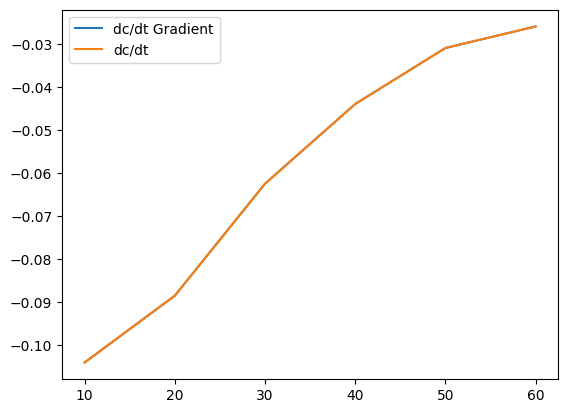

In [130]:
t = np.array([10, 20, 30, 40, 50, 60])
c = np.array([3.52, 2.48, 1.75, 1.23, 0.87, 0.61])
dc_dt = diferencias_finitas(c)
print(dc_dt)
dc_dt_gradient = np.gradient(np.array(c), np.array(t))
plt.plot(t, dc_dt_gradient, label = 'dc/dt Gradient')
plt.plot(t, dc_dt, label = 'dc/dt')
plt.legend()

<ipython-input-132-575d9895e433>:1: RuntimeWarning: invalid value encountered in log
  dc_dt_log = [np.log(-0.10400000000000001), np.log(-0.0885), np.log(-0.0625), np.log(-0.044), np.log(-0.031), np.log(-0.026000000000000002)]


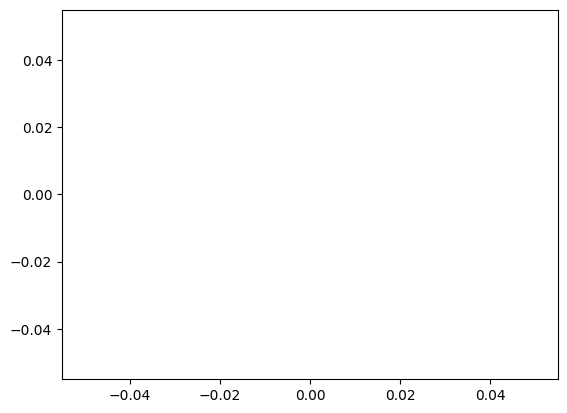

In [132]:
dc_dt_log = [np.log(-0.10400000000000001), np.log(-0.0885), np.log(-0.0625), np.log(-0.044), np.log(-0.031), np.log(-0.026000000000000002)]
plt.plot(t, dc_dt_log)

# 3
**(30 puntos)** Considere los  datos de concentración del punto anterior

```python
# Datos dados
t = np.array([10, 20, 30, 40, 50, 60])
c = np.array([5.29, 6.24, 7.02, 7.68, 8.25, 8.77])
```

*a)* Realice un gráfico de $c(t)$

*b)* Usando la interpolación de `scipy.interpolate.lagrange` y de `scipy.interpolate.CubicHermiteSpline` obtenga el polinomio interpolador de lagrange llamado `poly_lagrange` y de Hermite `poly_Hermite` para los datos datos.

*c)* Conociendo que `scipy.interpolate.lagrange` devuelve un array tipo Polynomial, use la siguiente rutina para encontrar la derivada:

``` python
from numpy.polynomial.polynomial import Polynomial

# Convertir a un objeto Polynomial para facilitar la derivación
poly_coef = Polynomial(poly_lagrange.coef[::-1])  # Convertimos los coeficientes
derivative = poly_coef.deriv()  # Calculamos la derivada
```

Luego, grafique $dc/dt$ en función del tiempo $t$ y compare con la función
$$
\frac{dc}{dt} = -kc^n
$$

con $k = 3$ y $n = -2$

*d)* Realice un gráfico del error absoluto




TypeError: poly1d.__call__() takes 2 positional arguments but 3 were given

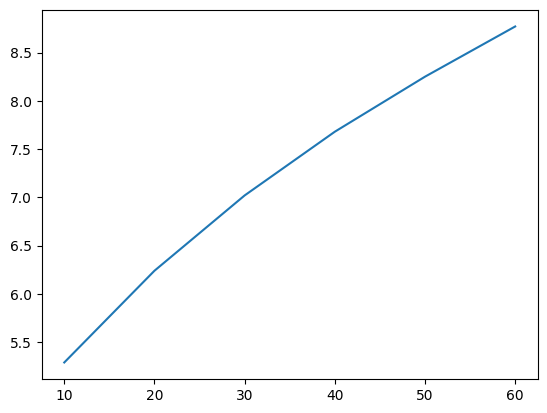

In [142]:
t = np.array([10, 20, 30, 40, 50, 60])
c = np.array([5.29, 6.24, 7.02, 7.68, 8.25, 8.77])
dc_dt = np.gradient(t,c)
plt.plot(t,c)
Poly_lagrange = lagrange(t, c)



In [139]:
lagrange?